In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
data=pd.read_csv('C:\\Users\\suneelnair1\\Documents\\Sunil\\Class_notes\\Kaggle_datasets\\Kaggle_datasets\\Cancer_sample_datasets\\Breast_cancer_data.csv')

In [3]:
data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
print("Row,Col",data.shape) #(row,col)

Row,Col (569, 31)


In [6]:
(data['diagnosis'][:398]==1).sum(),(data['diagnosis'][:398]==0).sum()

(173, 225)

In [7]:
(data['diagnosis'][398:]==1).sum(),(data['diagnosis'][398:]==0).sum()

(39, 132)

In [8]:
mat=data.as_matrix()
mat.shape

C:\Users\suneelnair1\AppData\Local\conda\conda\envs\neuralnets\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(569, 31)

In [9]:
mat

array([[ 1.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 0.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

## Using 2 Sigmoid Layers and RMSprop optimizer

In [10]:
model2 = Sequential()
model2.add(Dense(500,activation='sigmoid',use_bias=True,input_shape=(30,)))
model2.add(Dense(1,activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01,rho=0.9,epsilon=None,decay=0.0)
model2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history01 = model2.fit(mat[:,1:],mat[:,0],validation_split=0.3,shuffle=False,epochs=3000,batch_size=128,verbose=0)
score=model2.evaluate(mat[:398,1:],mat[:398,0],verbose=0, batch_size=128)
print('Train loss:',score[0])
print('Train Accuracy:',score[1])

Train loss: 0.014442525395419186
Train Accuracy: 0.9949748743718593


## Using 2 Sigmoid Layers and RMSprop optimizer

In [12]:
model2=Sequential()
model2.add(Dense(500,activation='sigmoid',use_bias=True,input_shape=(30,)))
model2.add(Dense(1,activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01,rho=0.9,epsilon=None,decay=0.0)
model2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history01=model2.fit(mat[:,1:],mat[:,0],validation_split=0.3,shuffle=False,epochs=3000,batch_size=128,verbose=0)
score=model2.evaluate(mat[:398,1:],mat[:398,0],verbose=0,batch_size=128)
print('Train loss: ',score[0])
print('Train Accuracy: ',score[1])

Train loss:  0.012980272199013201
Train Accuracy:  0.9974874371859297


In [14]:
score=model2.evaluate(mat[398:,1:],mat[398:,0],verbose=0,batch_size=128)
print('Validation loss:',score[0])
print('Validation accuracy: ',score[1])

Validation loss: 0.10876626381922884
Validation accuracy:  0.953216368691963


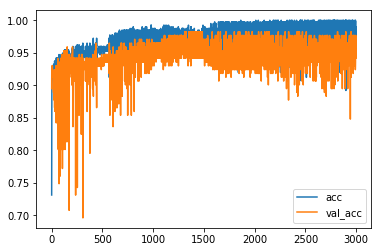

In [15]:
plt.plot(history01.history['acc'], label='acc')
plt.plot(history01.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

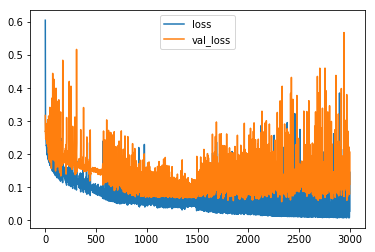

In [16]:
plt.plot(history01.history['loss'], label='loss')
plt.plot(history01.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [17]:
count=0
for i in history01.history['acc']:
    if i>0.99:
        count+=1
print(count)

832


In [18]:
model2.save('model2.h5')
print("Avg Training acc: ", np.mean(history01.history['acc']),"\nAvg Testing acc: ", np.mean(history01.history['val_acc']))

Avg Training acc:  0.9742345057484293 
Avg Testing acc:  0.9418576982321099


## Using 3 Sigmoid Layers and RMSprop optimizer

In [19]:
model3=Sequential()
model3.add(Dense(500,activation='sigmoid',use_bias=True,input_shape=(30,)))
model3.add(Dense(500,activation='sigmoid',use_bias=True))
model3.add(Dense(1,activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01,rho=0.9,epsilon=None,decay=0.0)
model3.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history0 = model3.fit(mat[:,1:],mat[:,0],validation_split=0.3,shuffle=False,epochs=3000,batch_size=128,verbose=0)
score2=model3.evaluate(mat[:398,1:],mat[:398,0],verbose=0,batch_size=128)
print('Train loss: ',score2[0])
print('Train accuracy: ',score2[1])


Train loss:  0.009043113218536179
Train accuracy:  1.0


In [20]:
score2 = model3.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score2[0])
print('Validation accuracy:', score2[1])

Validation loss: 0.11214461643793429
Validation accuracy: 0.964912277913233


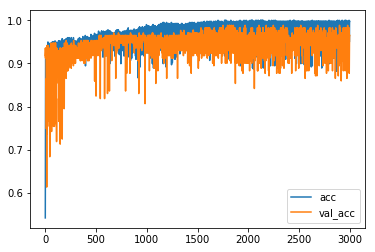

In [21]:
plt.plot(history0.history['acc'], label='acc')
plt.plot(history0.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

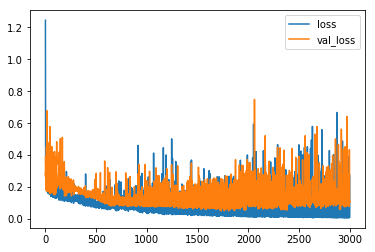

In [22]:
plt.plot(history0.history['loss'], label='loss')
plt.plot(history0.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [23]:
count=0
for i in history0.history['acc']:
    if i>0.99:
        count+=1
print(count)

907


In [24]:
model3.save('model3.h5')
print("Avg Training acc: ", np.mean(history0.history['acc']),"\nAvg Testing acc: ", np.mean(history0.history['val_acc']))

Avg Training acc:  0.9706515911868471 
Avg Testing acc:  0.9431812847515761


## Using 4 Sigmoid Layers and RMSprop optimizer

In [25]:
model4 = Sequential()
model4.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model4.add(Dense(500, activation='sigmoid', use_bias=True))
model4.add(Dense(500, activation='sigmoid', use_bias=True))
model4.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model4.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128, verbose=0)

In [27]:
score = model4.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.028196571932710128
Train accuracy: 0.9874371859296482


In [28]:
score = model4.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.24015732240258603
Validation accuracy: 0.9122807055886029


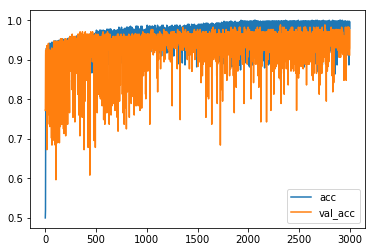

In [29]:
plt.plot(history1.history['acc'], label='acc')
plt.plot(history1.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

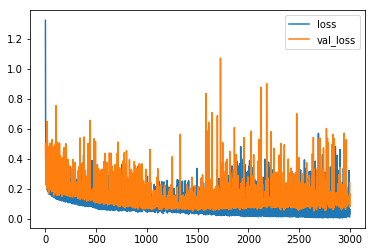

In [30]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [31]:
count=0
for i in history1.history['acc']:
    if i>0.99:
        count+=1
print(count)

648


In [32]:
model4.save('model4.h5')
print("Avg Training acc: ", np.mean(history1.history['acc']),"\nAvg Testing acc: ", np.mean(history1.history['val_acc']))

Avg Training acc:  0.9655678390379329 
Avg Testing acc:  0.9333411292611509


## Using 4 Sigmoid Layers and SGD optimizer

In [33]:
model7 = Sequential()
model7.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model7.add(Dense(500, activation='sigmoid', use_bias=True))
model7.add(Dense(500, activation='sigmoid', use_bias=True))
model7.add(Dense(1, activation='sigmoid'))
keras.optimizers.SGD(lr=0.01)
#keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model7.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model7.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128, verbose=0)

In [34]:
score = model7.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.31289534757484744
Train accuracy: 0.9120603018070585


In [35]:
score = model7.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.33298849780657136
Validation accuracy: 0.9005847991558543


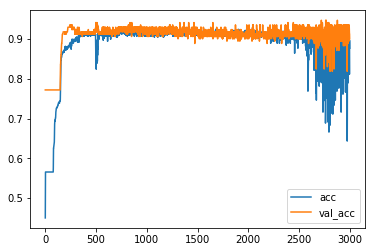

In [36]:
plt.plot(history2.history['acc'], label='acc')
plt.plot(history2.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

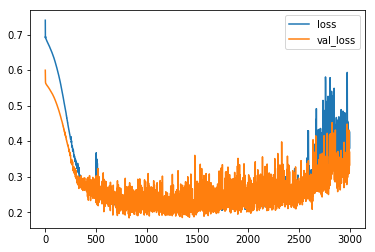

In [37]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [38]:
count=0
for i in history2.history['acc']:
    if i>0.99:
        count+=1
print(count)

0


In [39]:
model7.save('model7.h5')
print("Avg Training acc: ", np.mean(history2.history['acc']),"\nAvg Testing acc: ", np.mean(history2.history['val_acc']))

Avg Training acc:  0.8881465664482994 
Avg Testing acc:  0.9088323633260663


## Using 4 Sigmoid Layers and RMSprop optimizer with batch shuffle

In [40]:
model6 = Sequential()
model6.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model6.add(Dense(500, activation='sigmoid', use_bias=True))
model6.add(Dense(500, activation='sigmoid', use_bias=True))
model6.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model6.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = model6.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=True,epochs=3000, batch_size=128, verbose=0)

In [41]:
score = model6.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.25697435105416044
Train accuracy: 0.9145728634230456


In [42]:
score = model7.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.33298849780657136
Validation accuracy: 0.9005847991558543
